### EE 421/521 Image Processing - Spring 2021-22

## Subject 2 - Image Enhancement

In this demonstration of the lecture, you will learn the following:

1. Histogram and pdf calculation
2. Plotting a histrogram
3. Auto-contrast adjustment
4. Histrogram equalization
5. Histogram matching

*Copyright (c) 2020-2022 by Arif Tanju Erdem*

In [6]:
# STEP 0 Import the necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# histogram calculation
from skimage import exposure

# displaying images and plots
import matplotlib.pyplot as plt

# array operations
import numpy as np

In [7]:
# my function to round image data to nearest integer, then
# truncate to range [0, 255], and then set data type to uint8

def my_imgLuminance(imgRGB):
    
    # make sure it is a color image
    assert imgRGB.shape[2] == 3
    
    # get the luminance data
    imgLum = color.rgb2gray(imgRGB)

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')
    
    return imgLum

# end of function

In [8]:
# my function to convert float image data from range [0, 1] to range [0, 255], 
# and then set data type to uint8

def my_float2int(img):
    
    img = np.round(img * 255, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

# end of function

Low exposure image width is 300 and height is 350.
High exposure image width is 374 and height is 560.


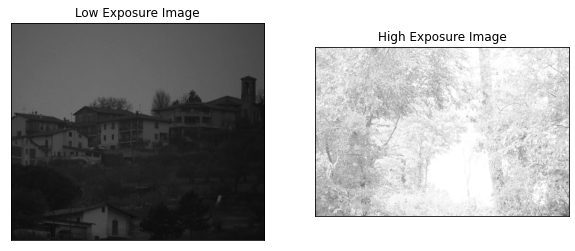

In [9]:
# STEP 1 Pick two different images, one with low exposure (i.e., a dark image) 
# and one with high exposure (i.e., a bright image). Calculate and display their luminance.

# set image folder
image_folder = r'C:\Users\Metin\Desktop\EE421\Week2'

# read under exposed image 
image_file = r'/under_exposed.jpg'
image_path = image_folder + image_file
imgRGB_low = io.imread(image_path)

# read over exposed image 
image_file = r'/over_exposed.jpg'
image_path = image_folder + image_file
imgRGB_high = io.imread(image_path)

# calculate luminance 
img_low = my_imgLuminance(imgRGB_low)
img_high = my_imgLuminance(imgRGB_high)

# print image size
print("Low exposure image width is {} and height is {}.".format(img_low.shape[0], img_low.shape[1]))
print("High exposure image width is {} and height is {}.".format(img_high.shape[0], img_high.shape[1]))

# display both images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_low, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_high, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

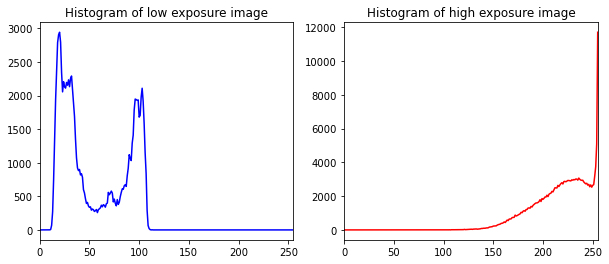

In [10]:
# STEP 2.a Calculate and display the histrogram of each image 

# histogram calculation
hist_low, bins = exposure.histogram(img_low, source_range='dtype')
hist_high, bins = exposure.histogram(img_high, source_range='dtype')

# histrogramx plots
plt.figure(figsize=(10,4))
plt.subplot(121), plt.plot(hist_low, 'b')
plt.xlim(0, 255)
plt.title('Histogram of low exposure image')
plt.subplot(122), plt.plot(hist_high, 'r')
plt.xlim(0, 255)
plt.title('Histogram of high exposure image')
plt.show()
plt.close()

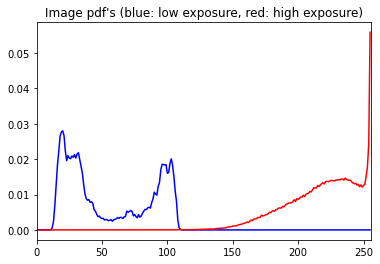

In [17]:
# STEP 2.b Calculate and display the pdf of each image 

# pdf calculation
pdf_low = hist_low / hist_low.sum()
pdf_high = hist_high / hist_high.sum()

# pdf plots
plt.plot(pdf_low, 'b')
plt.xlim([0,256])
plt.plot(pdf_high, 'r')
plt.xlim([0,256])
plt.title("Image pdf's (blue: low exposure, red: high exposure)")
plt.show()

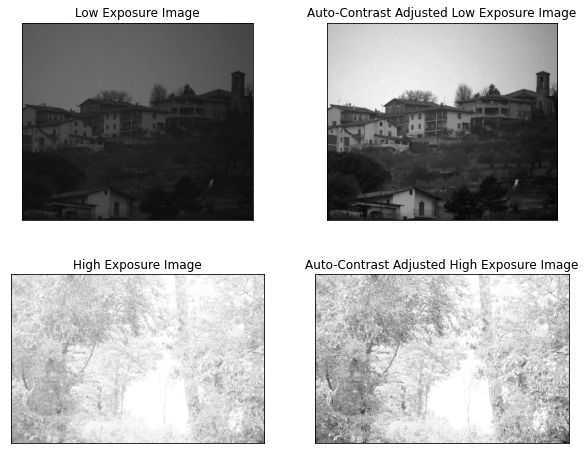

In [12]:
# STEP 3 auto contrast adjustment

# image 1
# find min and max values
val_low_min = img_low.min()
val_low_max = img_low.max()

# stretch brightness to max range
img_low_auto = (img_low - val_low_min) / (val_low_max - val_low_min)

# scale to 255 and convert to integer
img_low_auto = my_float2int(img_low_auto)

# image 2
# find min and max values
val_high_min = img_high.min()
val_high_max = img_high.max()

# stretch brightness to max range
img_high_auto = (img_high - val_high_min) / (val_high_max - val_high_min)

# scale to 255 and convert to integer
img_high_auto = my_float2int(img_high_auto)

# display auto contrast adjusted images
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(img_low, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_low_auto, cmap = 'gray', vmin=0, vmax=255)
plt.title('Auto-Contrast Adjusted Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_high, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img_high_auto, cmap = 'gray', vmin=0, vmax=255)
plt.title('Auto-Contrast Adjusted High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

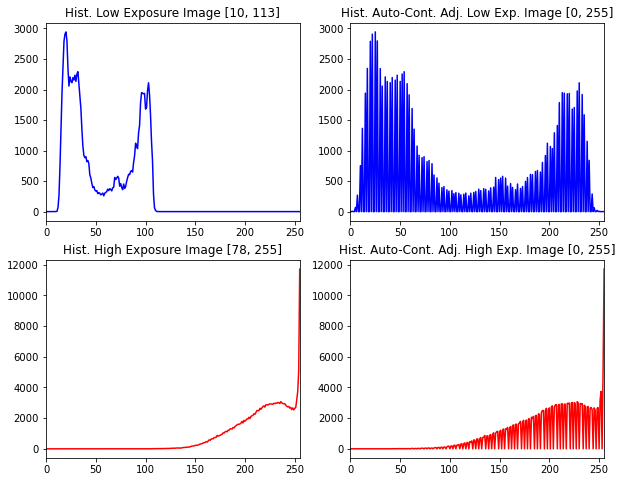

In [13]:
# STEP 4 Calculate and display the histrogram of auto contrast adjusted images

# histogram calculation
hist_low_auto, bins = exposure.histogram(img_low_auto, source_range='dtype')
hist_high_auto, bins = exposure.histogram(img_high_auto, source_range='dtype')

# find min and max values
val_low_auto_min = img_low_auto.min()
val_low_auto_max = img_low_auto.max()
val_high_auto_min = img_high_auto.min()
val_high_auto_max = img_high_auto.max()

# histrogram plots
plt.figure(figsize=(10,8))
plt.subplot(221), plt.plot(hist_low, 'b')
plt.xlim(0, 255)
plt.title('Hist. Low Exposure Image [{}, {}]'.format(val_low_min, val_low_max))
plt.subplot(222), plt.plot(hist_low_auto, 'b')
plt.xlim(0, 255)
plt.title('Hist. Auto-Cont. Adj. Low Exp. Image [{}, {}]'.format(val_low_auto_min, val_low_auto_max))
plt.subplot(223), plt.plot(hist_high, 'r')
plt.xlim(0, 255)
plt.title('Hist. High Exposure Image [{}, {}]'.format(val_high_min, val_high_max))
plt.subplot(224), plt.plot(hist_high_auto, 'r')
plt.xlim(0, 255)
plt.title('Hist. Auto-Cont. Adj. High Exp. Image [{}, {}]'.format(val_high_auto_min, val_high_auto_max))
plt.show()
plt.close()

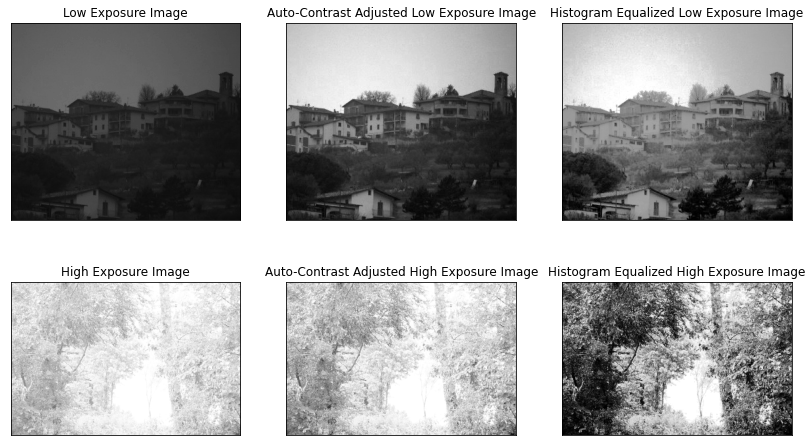

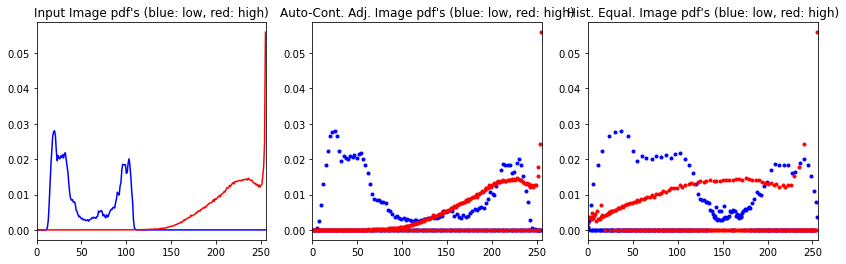

In [14]:
# STEP 5 Apply histogram equalization to each image and 
# display the resulting images and their histograms

# histogram equalization
img_low_eq = exposure.equalize_hist(img_low)
img_high_eq = exposure.equalize_hist(img_high)

img_low_eq = my_float2int(img_low_eq)
img_high_eq = my_float2int(img_high_eq)

# display original and histogram equalized images
plt.figure(figsize=(14,8))

plt.subplot(231), plt.imshow(img_low, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(img_low_auto, cmap = 'gray', vmin=0, vmax=255)
plt.title('Auto-Contrast Adjusted Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(img_low_eq, cmap = 'gray', vmin=0, vmax=255)
plt.title('Histogram Equalized Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(img_high, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(img_high_auto, cmap = 'gray', vmin=0, vmax=255)
plt.title('Auto-Contrast Adjusted High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(img_high_eq, cmap = 'gray', vmin=0, vmax=255)
plt.title('Histogram Equalized High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

# calculate equalized histograms
hist_low_eq, bins = exposure.histogram(img_low_eq, source_range='dtype')
hist_high_eq, bins = exposure.histogram(img_high_eq, source_range='dtype')

# calculate equalized pdf's
pdf_low_eq = hist_low_eq / hist_low_eq.sum()
pdf_high_eq = hist_high_eq / hist_high_eq.sum()

# calculate auto-contrast adjusted pdf's
pdf_low_auto = hist_low_auto / hist_low_auto.sum()
pdf_high_auto = hist_high_auto / hist_high_auto.sum()

# plot equalized pdf's
plt.figure(figsize=(14,4))
plt.subplot(131), plt.plot(pdf_low, 'b'), plt.xlim([0,256])
plt.plot(pdf_high, 'r'), plt.xlim([0,256])
plt.title("Input Image pdf's (blue: low, red: high)")
plt.subplot(132), plt.plot(pdf_low_auto, '.b'), plt.xlim([0,256])
plt.plot(pdf_high_auto, '.r'), plt.xlim([0,256])
plt.title("Auto-Cont. Adj. Image pdf's (blue: low, red: high)")
plt.subplot(133), plt.plot(pdf_low_eq, '.b'), plt.xlim([0,256])
plt.plot(pdf_high_eq, '.r'), plt.xlim([0,256])
plt.title("Hist. Equal. Image pdf's (blue: low, red: high)")
plt.show()
plt.close()

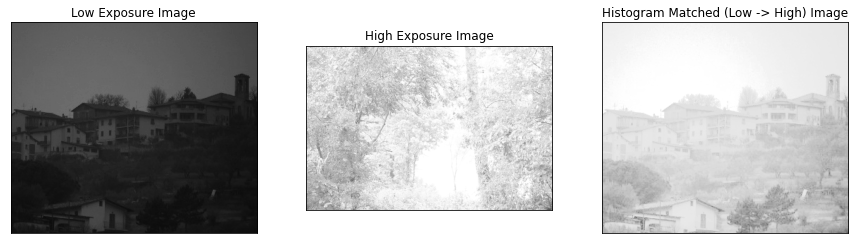

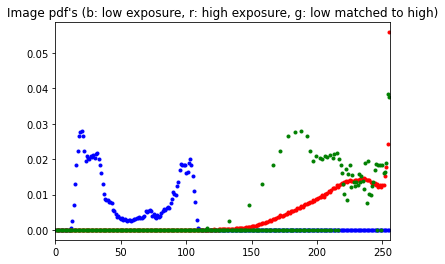

In [15]:
# STEP 6 Modify the original dark image so that 
# its histogram matches that of the original bright image. 
# Display the modified image and its histrogram.

# map the pixel intensities in the low exposure image so that its pdf "matches" that of the high exposure image
img_matched = exposure.match_histograms(img_low, img_high, multichannel=False)
# round to nearest integer
np.round(img_matched, 0, img_matched)
# set data type to integer
img_matched = img_matched.astype(np.uint8)

# calculate matched histogram and pdf
hist_matched, bins = exposure.histogram(img_matched, source_range='dtype')
pdf_matched = hist_matched / hist_matched.sum()

# display the images
plt.figure(figsize=(15,4))
plt.subplot(131), plt.imshow(img_low, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_high, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_matched, cmap = 'gray', vmin=0, vmax=255)
plt.title('Histogram Matched (Low -> High) Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

# display the pdf's
plt.plot(pdf_low, '.b')
plt.xlim(0, 256)
plt.plot(pdf_high, '.r')
plt.xlim(0, 256)
plt.plot(pdf_matched, '.g')
plt.xlim(0, 256)
plt.title("Image pdf's (b: low exposure, r: high exposure, g: low matched to high)")
plt.show()